## Assignment 1


In [77]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

from statsmodels.formula.api import ols
from scipy.stats import norm, probplot
from sklearn.preprocessing import StandardScaler

db_dir = os.getcwd()
train_data = pd.read_csv(db_dir + r'/data/train.csv')
test_data = pd.read_csv(db_dir + r'/data/test.csv')

In [78]:
# Drop columns where more than 20% of the data is missing
missing_percentage = train_data.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 20].index
train_missingvaluesremoved = train_data.drop(columns=columns_to_drop, inplace=True)
print(missing_percentage[missing_percentage > 20])

missing_percentage_test = test_data.isnull().mean() * 100
columns_to_drop_test = missing_percentage_test[missing_percentage_test > 20].index
test_missingvaluesremoved = test_data.drop(columns=columns_to_drop, inplace=True)
print(missing_percentage_test[missing_percentage_test > 20])

Alley          93.767123
MasVnrType     59.726027
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64
Alley          92.666210
MasVnrType     61.274846
FireplaceQu    50.034270
PoolQC         99.794380
Fence          80.123372
MiscFeature    96.504455
dtype: float64


In [79]:
# Fill in Missing values with either null or 0 depending on the data type
for col in train_data.columns:
    if train_data[col].dtype == "object":
        train_data[col].fillna('None', inplace=True)
    else:
        train_data[col].fillna(0, inplace=True)

for col in test_data.columns:
    if test_data[col].dtype == "object":
        test_data[col].fillna('None', inplace=True)
    else:
        test_data[col].fillna(0, inplace=True)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [80]:
remaining_missing_train = train_data.isnull().sum().sum()
remaining_missing_test = test_data.isnull().sum().sum()
remaining_missing_train, remaining_missing_test

(0, 0)

D:\Users\ezhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


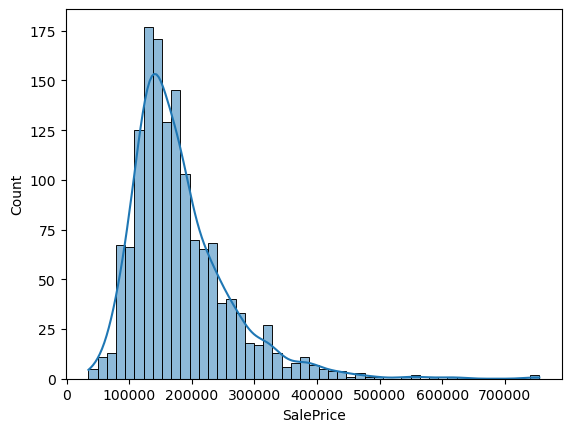

In [81]:
sns.histplot(x = train_data['SalePrice'],kde=True)
plt.show()

D:\Users\ezhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


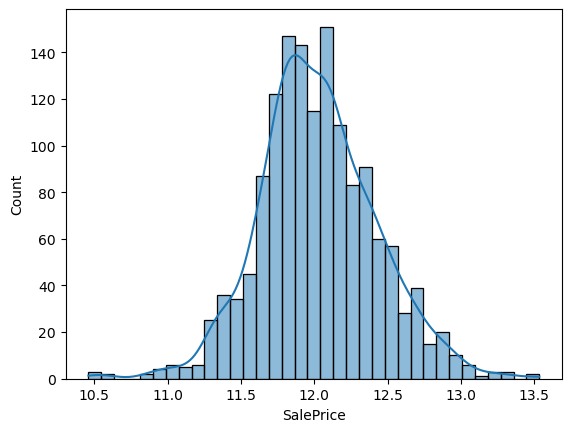

In [82]:
#log transform
sns.histplot(x = np.log(train_data['SalePrice']),kde=True)
plt.show()

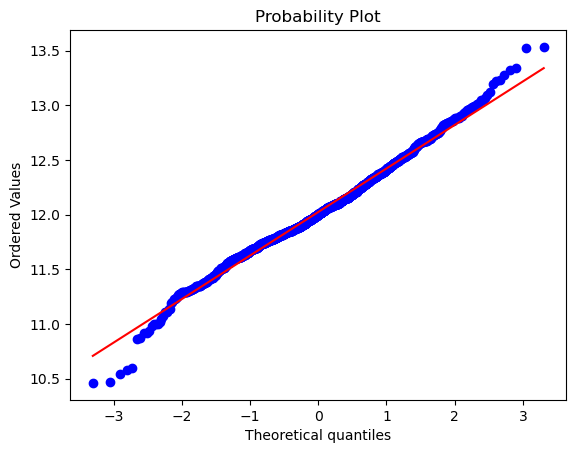

In [83]:
import scipy.stats as stats
fig = plt.figure()
res = stats.probplot(np.log(train_data['SalePrice']), plot=plt)
plt.show()

In [84]:
#run regression changed categorial to numeric
train_data['SalePrice'] = np.log(train_data['SalePrice'])
train_data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534473


In [85]:
from sklearn.model_selection import train_test_split, cross_val_score

X = train_data.drop(columns=['SalePrice', 'Id'])
y = train_data['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns and apply one-hot encoding
categorical_columns = X_train.select_dtypes(include=['object']).columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_columns, drop_first=True)

# X_train_encoded and X_val_encoded have the same columns
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Initialize models
lasso = Lasso(alpha=0.1, random_state=42)
ridge = Ridge(alpha=0.1, random_state=42)

# Train models
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

# Predictions
lasso_preds = lasso.predict(X_val_scaled)
ridge_preds = ridge.predict(X_val_scaled)

# Calculate mean squared error
lasso_mse = mean_squared_error(y_val, lasso_preds)
lasso_mape = mean_absolute_percentage_error(y_val, lasso_preds) * 100
print(f'LASSO Mean Squared Error: {lasso_mse}')
print(f'LASSO Testing MAPE: {lasso_mape}')

LASSO Mean Squared Error: 0.05794968975254789
LASSO Testing MAPE: 1.4346446375235362


In [86]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(cv=10, random_state=0) 
lasso_cv_model.fit(X_train_scaled, y_train.values.ravel())

# Get the best alpha
best_alpha = lasso_cv_model.alpha_
print(f'Best alpha: {best_alpha}')


Best alpha: 0.0055126709154020796


In [87]:
from sklearn.metrics import mean_squared_error, r2_score

# Lasso: Already trained using best_alpha from LassoCV
lasso_val_preds = lasso.predict(X_val_scaled) 
lasso_val_mse = mean_squared_error(y_val, lasso_val_preds)
lasso_val_r2 = r2_score(y_val, lasso_val_preds)

# Ridge: Already trained using best_alpha from RidgeCV
ridge_val_preds = ridge.predict(X_val_scaled) 
ridge_val_mse = mean_squared_error(y_val, ridge_val_preds)
ridge_val_r2 = r2_score(y_val, ridge_val_preds)

# Print and compare results
print(f'Lasso Validation MSE: {lasso_val_mse}')
print(f'Lasso Validation R-squared: {lasso_val_r2}')

print(f'Ridge Validation MSE: {ridge_val_mse}')
print(f'Ridge Validation R-squared: {ridge_val_r2}')

Lasso Validation MSE: 0.05794968975254789
Lasso Validation R-squared: 0.6894668173204457
Ridge Validation MSE: 7.6061973736659825
Ridge Validation R-squared: -39.75909100841243


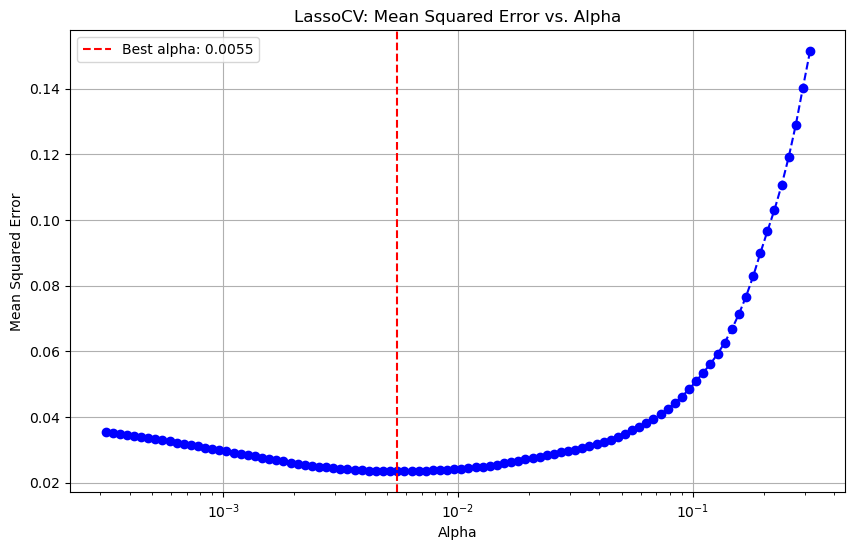

In [88]:
mse_path = lasso_cv_model.mse_path_.mean(axis=1)
alphas = lasso_cv_model.alphas_

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_path, marker='o', linestyle='--', color='b')
plt.axvline(x=best_alpha, linestyle='--', color='r', label=f'Best alpha: {best_alpha:.4f}')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('LassoCV: Mean Squared Error vs. Alpha')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [91]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Step 1: Retrain the Lasso model using the best alpha
lasso_model = Lasso(alpha=best_alpha, random_state=0)
lasso_model.fit(X_train_scaled, y_train.ravel())

# Step 2: Evaluate the model on the validation set
X_val_encoded = pd.get_dummies(X_val, columns=categorical_columns, drop_first=True) # Encode X_val
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0) # Align columns
X_val_scaled = scaler.transform(X_val_encoded)  # Scale the validation data (now encoded)
lasso_val_preds = lasso_model.predict(X_val_scaled)
lasso_val_mse = mean_squared_error(y_val, lasso_val_preds)

print(f'Validation Mean Squared Error: {lasso_val_mse}')

# Get the coefficients of the Lasso model
coefficients = lasso_model.coef_

# Create a DataFrame to view them alongside the feature names
coeff_df = pd.DataFrame({
    'Feature': X_train_encoded.columns, 
    'Coefficient': coefficients
})

# Sort the coefficients by their absolute values
coeff_df = coeff_df.reindex(coeff_df['Coefficient'].abs().sort_values(ascending=False).index)

test_data_encoded = pd.get_dummies(test_data.drop(columns=['Id']), columns=categorical_columns, drop_first=True) # Drop 'Id' and encode
test_data_encoded = test_data_encoded.reindex(columns=X_train_encoded.columns, fill_value=0) # Align columns with training data
test_data_scaled = scaler.transform(test_data_encoded) # Scale using the same scaler

print(coeff_df.head(10))  # Print the top 10 most important features

# Assuming test_data_scaled has already been prepared
lasso_test_preds = lasso_model.predict(test_data_scaled)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'Id': test_data['Id'],  # Assuming 'Id' column exists in your test data
    'SalePrice': lasso_test_preds
})

# Save the submission to a CSV file
submission.to_csv('house_price_predictions_lasso.csv', index=False)


Validation Mean Squared Error: 0.020742788223989377
                 Feature  Coefficient
15             GrLivArea     0.103161
3            OverallQual     0.098400
25            GarageCars     0.046329
5              YearBuilt     0.035835
4            OverallCond     0.031590
16          BsmtFullBath     0.026423
69  Neighborhood_NridgHt     0.023679
6           YearRemodAdd     0.022941
23            Fireplaces     0.022104
89       Condition2_PosN    -0.019634


In [ ]:
#below was prework

<Figure size 600x600 with 0 Axes>

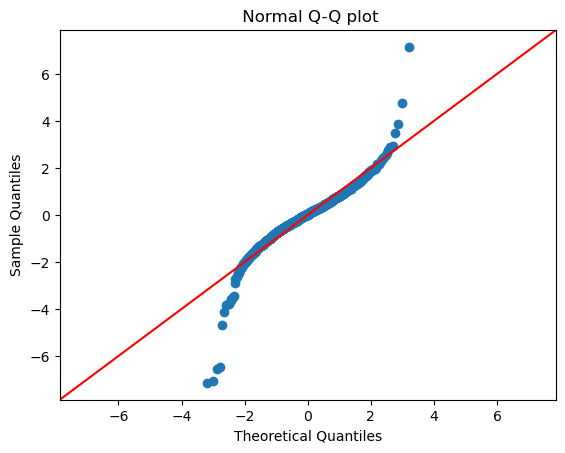

In [91]:
plt.figure(figsize=(6,6))
sm.qqplot(model.resid, line='45', fit=True)
plt.title(" Normal Q-Q plot")
plt.show()

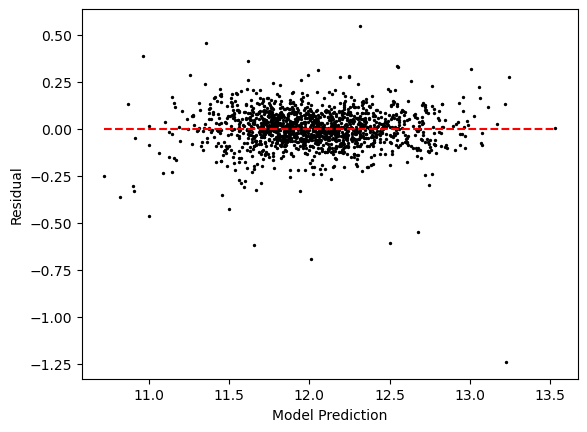

In [101]:
residuals = y_train - reg.predict(X_train)
predicted_y = reg.predict(X_train)
import matplotlib.pyplot as plt

plt.scatter(predicted_y, residuals, s=2, c='black')
plt.hlines(0, min(predicted_y), max(predicted_y), color='red', linestyles='dashed')
plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()